In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import pickle
import os
import time

import seaborn as sns
sns.set()
from matplotlib import style
# style.use('ggplot')

import src.utils as utils

%load_ext autoreload
%autoreload 2

In [2]:
info = pd.read_csv('./data/all_stocks_info.csv')
info = info.drop(columns=['name', 'exchange', 'industry'])
info.head()

ticker             sector
0    PIH            FINANCE
1  PIHPP            FINANCE
2   TURN            FINANCE
3   FLWS  CONSUMER SERVICES
4   FCCY            FINANCE

In [461]:
scalars = pd.read_csv('./scalers.csv')
scalars

ticker  Adj Close_max  Adj Close_min
0        A      90.129997      32.051151
1      AAL      56.988728      24.281271
2      AAP     198.929214      79.076965
3     AAPL     327.200012      85.192909
4     ABBV     111.540894      40.301739
5      ABC     106.183388      64.822937
6     ABMD     449.750000      36.130001
7      ABT      91.860001      33.534241
8      ACN     214.160004      75.538071
9     ADBE     379.670013      69.989998
10     ADI     123.431526      44.638176
11     ADM      49.278984      26.697189
12     ADP     181.250000      66.535393
13     ADS     295.799866      98.822113
14    ADSK     208.949997      42.639999
15     AEE      86.790001      32.535908
16     AEP     104.330002      44.648251
17     AES      21.030001       7.173414
18     AFL      56.018860      23.361937
19     AGN     321.929077     114.304695
20     AIG      62.514599      35.676571
21     AIV      54.869999      30.034117
22     AIZ     142.520004      53.815361
23     AJG     109.160004      32.516582
24    AKAM     100.959999      39.570000
25     ALB     139.360199      38.993843
26    ALGN     392.980011      52.450001
27     ALK      94.471420      51.720436
28     ALL     125.570000      52.309044
29    ALLE     138.899994      50.608479
30    ALXN     207.839996      93.940002
31    AMAT      67.370003      13.423786
32     AMD      56.889999       1.620000
33     AME     101.860001      42.871204
34     AMG     221.123627      71.260658
35    AMGN     241.485809     116.739716
36     AMP     178.820007      68.603165
37     AMT     256.899994      77.266129
38    AMZN    2160.000000     286.950012
39    ANET     328.540009      53.000000
40    ANSS     292.459991      79.260002
41    ANTM     313.783691     110.724586
42     AON     235.729996      80.587418
43     AOS      65.327309      24.739876
44     APA      63.217793      18.239349
45     APD     256.010010      96.147682
46     APH     109.790001      43.737549
47    APTV     101.066231      44.989796
48     ARE     174.929993      63.639023
49    ARNC      36.683491      14.538983
50     ATO     120.570000      46.296944
51    ATVI      82.725464      17.866625
52     AVB     228.070007     138.344406
53    AVGO     324.700012      85.697571
54     AVY     140.110001      46.059849
55     AWK     139.320007      44.201626
56     AXP     135.869995      47.974159
57     AZO    1250.000000     493.149994
58      BA     430.299988      97.400223
59     BAC      35.639999      10.385541
60     BAX      93.300003      30.821606
61     BBY      91.260002      23.181747
62     BDX     285.989990     122.705193
63     BEN      48.393093      24.209999
64    BIIB     475.980011     216.710007
65      BK      55.525219      30.173681
66    BKNG    2206.090088     973.799988
67     BLK     572.479980     261.136810
68     BLL      80.597923      28.859493
69     BMY      69.387672      42.116314
70      BR     134.231354      40.981884
71     BSX      45.709999      13.700000
72     BWA      58.760105      26.239235
73     BXP     147.509995      96.915062
74       C      81.370491      32.323948
75     CAG      38.349934      20.065426
76     CAH      78.808388      40.803928
77     CAT     162.161331      51.628677
78      CB     165.330002      89.634506
79    CBOE     134.006744      52.302418
80    CBRE      64.250000      23.320000
81     CCI     166.210007      65.008118
82     CCL      66.990425      36.562664
83    CDNS      79.250000      17.129999
84     CDW     144.630005      31.622700
85      CE     126.675232      48.127964
86    CELG     146.520004      59.209999
87    CERN      80.230003      47.012184
88      CF      58.947624      18.926180
89     CFG      44.531883      16.330811
90     CHD      79.759132      34.867157
91    CHRW      97.190887      54.738369
92    CHTR     537.599976     150.600006
93      CI     226.112167     100.923241
94    CINF     116.787254      43.316315
95      CL      77.349998      54.334282
96     CLX     167.660004  

# RF

In [465]:
scalars.info(), rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker         485 non-null    object 
 1   Adj Close_max  485 non-null    float64
 2   Adj Close_min  485 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60517 entries, 0 to 60516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          60517 non-null  object 
 1   ticker        60517 non-null  object 
 2   target_price  60517 non-null  float64
 3   rf_pred       60517 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.8+ MB


(None, None)

In [469]:
rf = pd.read_csv('./Results/rf_test_preds.csv')
rf.head()

Date ticker  target_price   rf_pred
0  2020-02-13    ZTS      0.992781  0.941340
1  2020-02-13    ADM      0.800327  0.821499
2  2020-02-13    CLX      0.963318  0.961680
3  2020-02-13    MPC      0.563533  0.579400
4  2020-02-13    ROP      1.000000  0.961907

In [468]:
rf = rf.merge(scalars, on='ticker')#, how='left')
rf.loc[rf.ticker=='GOOG', :].head()

Date ticker  target_price   rf_pred  Adj Close_max  Adj Close_min
40990  2020-02-13   GOOG      1.000000  0.952662     1520.73999     491.201416
40991  2020-02-12   GOOG      0.994094  0.954031     1520.73999     491.201416
40992  2020-02-11   GOOG      0.997601  0.955958     1520.73999     491.201416
40993  2020-02-10   GOOG      0.988393  0.961762     1520.73999     491.201416
40994  2020-02-07   GOOG      0.988286  0.952109     1520.73999     491.201416

In [470]:
rf = rf.merge(scalars, on='ticker')
rf['Adj Close'] = rf['Adj Close_min'] + rf['target_price'] * (rf['Adj Close_max'] - rf['Adj Close_min'])
rf['rf'] = rf['Adj Close_min'] + rf['rf_pred'] * (rf['Adj Close_max'] - rf['Adj Close_min'])
# rf.tail()

In [642]:
utils.scores(rf['Adj Close'], rf['rf'])

{'MAE': 1.667536394731813,
 'MAPE': 1.3077468395578462,
 'RMSE': 4.8605767430851134,
 'RMSPE': 1.9216256232461828}

# XGBoost

In [474]:
xgb = pd.read_csv('./Results/xgb_test_preds.csv')

xgb = xgb.merge(scalars, on='ticker')
xgb['Adj Close'] = xgb['Adj Close_min'] + xgb['target_price'] * (xgb['Adj Close_max'] - xgb['Adj Close_min'])
xgb['xgb'] = xgb['Adj Close_min'] + xgb['xgb_pred'] * (xgb['Adj Close_max'] - xgb['Adj Close_min'])
xgb.head()

Date ticker  target_price  xgb_pred  Adj Close_max  Adj Close_min  \
0  2020-02-13    ZTS      0.992781  0.952338     144.940002      38.278954   
1  2020-02-12    ZTS      1.000000  0.963548     144.940002      38.278954   
2  2020-02-11    ZTS      0.981624  0.978012     144.940002      38.278954   
3  2020-02-10    ZTS      0.991468  0.977890     144.940002      38.278954   
4  2020-02-07    ZTS      0.977593  0.934019     144.940002      38.278954   

    Adj Close         xgb  
0  144.169998  139.856296  
1  144.940002  141.052015  
2  142.979996  142.594704  
3  144.029999  142.581690  
4  142.550003  137.902448

In [476]:
utils.scores(xgb['Adj Close'], xgb['xgb'])

{'MAE': 1.6558097514662586,
 'MAPE': 1.2784555634929622,
 'RMSE': 4.573695516389642,
 'RMSPE': 1.8292545978527572}

# TCN

In [603]:
tcn = pd.read_csv('./Results/tcn_test_preds.csv')
# utils.scores(tcn['target_price'], tcn['tcn_pred'])
tcn.head()

Date ticker  target_price  tcn_pred
0  2019-08-16      A      0.678284  0.648006
1  2019-08-19      A      0.667483  0.660182
2  2019-08-20      A      0.685999  0.653482
3  2019-08-21      A      0.678112  0.670358
4  2019-08-22      A      0.640565  0.665169

In [605]:
tcn = tcn.merge(scalars, on='ticker')
tcn['Adj Close'] = tcn['Adj Close_min'] + tcn['target_price'] * (tcn['Adj Close_max'] - tcn['Adj Close_min'])
tcn['tcn'] = tcn['Adj Close_min'] + tcn['tcn_pred'] * (tcn['Adj Close_max'] - tcn['Adj Close_min'])
tcn.head()

Date ticker  target_price  tcn_pred  Adj Close_max  Adj Close_min  \
0  2019-08-16      A      0.678284  0.700992      90.129997      32.051151   
1  2019-08-19      A      0.667483  0.672958      90.129997      32.051151   
2  2019-08-20      A      0.685999  0.710387      90.129997      32.051151   
3  2019-08-21      A      0.678112  0.683928      90.129997      32.051151   
4  2019-08-22      A      0.640565  0.622112      90.129997      32.051151   

   Adj Close        tcn  
0  71.445092  72.763953  
1  70.817770  71.135778  
2  71.893173  73.309587  
3  71.435125  71.772883  
4  69.254439  68.182708

In [606]:
utils.scores(tcn['Adj Close'], tcn['tcn'])

{'MAE': 2.1542813036694777,
 'MAPE': 1.5013032375324808,
 'RMSE': 5.790781274427264,
 'RMSPE': 1.9648458371302122}

# LSTM

In [490]:
lstm = pd.read_csv('./Results/lstm_test_preds.csv')
lstm.head()

Date ticker  target_price  lstm_pred
0  2019-08-16      A      0.678284   0.656037
1  2019-08-19      A      0.667483   0.669552
2  2019-08-20      A      0.685999   0.657364
3  2019-08-21      A      0.678112   0.675457
4  2019-08-22      A      0.640565   0.667131

In [492]:
lstm = lstm.merge(scalars, on='ticker')
lstm['Adj Close'] = lstm['Adj Close_min'] + lstm['target_price'] * (lstm['Adj Close_max'] - lstm['Adj Close_min'])
lstm['lstm'] = lstm['Adj Close_min'] + lstm['lstm_pred'] * (lstm['Adj Close_max'] - lstm['Adj Close_min'])
lstm.head()

Date ticker  target_price  lstm_pred  Adj Close_max  Adj Close_min  \
0  2019-08-16      A      0.678284   0.656037      90.129997      32.051151   
1  2019-08-19      A      0.667483   0.669552      90.129997      32.051151   
2  2019-08-20      A      0.685999   0.657364      90.129997      32.051151   
3  2019-08-21      A      0.678112   0.675457      90.129997      32.051151   
4  2019-08-22      A      0.640565   0.667131      90.129997      32.051151   

   Adj Close       lstm  
0  71.445092  70.153007  
1  70.817770  70.937933  
2  71.893173  70.230108  
3  71.435125  71.280928  
4  69.254439  70.797323

In [493]:
utils.scores(lstm['Adj Close'], lstm['lstm'])

{'MAE': 2.3573081296197618,
 'MAPE': 1.6226198255953883,
 'RMSE': 6.353427047040315,
 'RMSPE': 2.069805295950232}

# Stock2Vec

In [479]:
s2v = pd.read_csv('./Results/stock2vec_test_preds.csv')

s2v = s2v.merge(scalars, on='ticker')
s2v['Adj Close'] = s2v['Adj Close_min'] + s2v['target_price'] * (s2v['Adj Close_max'] - s2v['Adj Close_min'])
s2v['s2v'] = s2v['Adj Close_min'] + s2v['s2v_pred'] * (s2v['Adj Close_max'] - s2v['Adj Close_min'])
s2v.head()

Date ticker  target_price  s2v_pred  Adj Close_max  Adj Close_min  \
0  2020-02-13    SLG      0.559411  0.560224     114.495049      70.338104   
1  2020-02-12    SLG      0.550806  0.551442     114.495049      70.338104   
2  2020-02-11    SLG      0.554656  0.556069     114.495049      70.338104   
3  2020-02-10    SLG      0.549220  0.550071     114.495049      70.338104   
4  2020-02-07    SLG      0.536312  0.552796     114.495049      70.338104   

   Adj Close        s2v  
0  95.040001  95.075880  
1  94.660004  94.688085  
2  94.830002  94.892431  
3  94.589996  94.627557  
4  94.019997  94.747885

In [481]:
utils.scores(s2v['Adj Close'], s2v['s2v'])

{'MAE': 1.0414150075297266,
 'MAPE': 0.759566908391734,
 'RMSE': 2.940415043016122,
 'RMSPE': 1.0528916279869331}

In [563]:
s2v.tail()

Date ticker  target_price  s2v_pred  Adj Close_max  \
60512  2019-08-22   CELG      0.398351  0.387456     146.520004   
60513  2019-08-21   CELG      0.418051  0.419346     146.520004   
60514  2019-08-20   CELG      0.417707  0.418460     146.520004   
60515  2019-08-19   CELG      0.412897  0.408000     146.520004   
60516  2019-08-16   CELG      0.412438  0.420029     146.520004   

       Adj Close_min  Adj Close        s2v  
60512      59.209999  93.989998  93.038818  
60513      59.209999  95.709999  95.823103  
60514      59.209999  95.680000  95.745715  
60515      59.209999  95.260002  94.832458  
60516      59.209999  95.220001  95.882705

# LSTM-Stock2Vec

In [571]:
rs2v = pd.read_csv('./Results/lstm_s2v_test_preds.csv')

rs2v = rs2v.merge(scalars, on='ticker')
rs2v['Adj Close'] = rs2v['Adj Close_min'] + rs2v['target_price'] * (rs2v['Adj Close_max'] - rs2v['Adj Close_min'])
rs2v['rs2v'] = rs2v['Adj Close_min'] + rs2v['rs2v_pred'] * (rs2v['Adj Close_max'] - rs2v['Adj Close_min'])
rs2v.head()

Date ticker  target_price  rs2v_pred  Adj Close_max  Adj Close_min  \
0  2019-08-16      A      0.678284   0.680662      90.129997      32.051151   
1  2019-08-19      A      0.667483   0.669525      90.129997      32.051151   
2  2019-08-20      A      0.685999   0.678747      90.129997      32.051151   
3  2019-08-21      A      0.678112   0.684476      90.129997      32.051151   
4  2019-08-22      A      0.640565   0.639659      90.129997      32.051151   

   Adj Close       rs2v  
0  71.445092  71.583215  
1  70.817770  70.936373  
2  71.893173  71.471982  
3  71.435125  71.804751  
4  69.254439  69.201786

In [572]:
utils.scores(rs2v['Adj Close'], rs2v['rs2v'])

{'MAE': 0.8521300841181373,
 'MAPE': 0.6787031443880697,
 'RMSE': 2.571658801539428,
 'RMSPE': 1.0420334456439826}

# TCN-Stock2Vec

In [486]:
cs2v = pd.read_csv('./Results/tcn_s2v_test_preds.csv')

cs2v = cs2v.merge(scalars, on='ticker')
cs2v['Adj Close'] = cs2v['Adj Close_min'] + cs2v['target_price'] * (cs2v['Adj Close_max'] - cs2v['Adj Close_min'])
cs2v['cs2v'] = cs2v['Adj Close_min'] + cs2v['cs2v_pred'] * (cs2v['Adj Close_max'] - cs2v['Adj Close_min'])
cs2v.head()

Date ticker  target_price  cs2v_pred  Adj Close_max  Adj Close_min  \
0  2019-08-16      A      0.678284   0.684524      90.129997      32.051151   
1  2019-08-19      A      0.667483   0.673555      90.129997      32.051151   
2  2019-08-20      A      0.685999   0.674363      90.129997      32.051151   
3  2019-08-21      A      0.678112   0.685047      90.129997      32.051151   
4  2019-08-22      A      0.640565   0.660101      90.129997      32.051151   

   Adj Close       cs2v  
0  71.445092  71.807492  
1  70.817770  71.170466  
2  71.893173  71.217356  
3  71.435125  71.837906  
4  69.254439  70.389059

In [487]:
utils.scores(cs2v['Adj Close'], cs2v['cs2v'])

{'MAE': 0.7846175094836271,
 'MAPE': 0.6126319553930722,
 'RMSE': 2.223121041488233,
 'RMSPE': 0.899829630236813}

# Combine

In [504]:
results = rf.loc[:, ['Date', 'ticker', 'Adj Close', 'rf']]
results.head()

Date ticker   Adj Close          rf
0  2020-02-13    ZTS  144.169998  138.683300
1  2020-02-12    ZTS  144.940002  139.646006
2  2020-02-11    ZTS  142.979996  139.280881
3  2020-02-10    ZTS  144.029999  140.789869
4  2020-02-07    ZTS  142.550003  138.462844

In [505]:
results = results.merge(xgb.loc[:, ['Date', 'ticker', 'xgb']], on=['Date', 'ticker'])c

In [506]:
results = results.merge(tcn.loc[:, ['Date', 'ticker', 'tcn']], on=['Date', 'ticker'])

In [507]:
results = results.merge(lstm.loc[:, ['Date', 'ticker', 'lstm']], on=['Date', 'ticker'])

In [508]:
results = results.merge(s2v.loc[:, ['Date', 'ticker', 's2v']], on=['Date', 'ticker'])

In [509]:
results = results.merge(rs2v.loc[:, ['Date', 'ticker', 'rs2v']], on=['Date', 'ticker'])

In [510]:
results = results.merge(cs2v.loc[:, ['Date', 'ticker', 'cs2v']], on=['Date', 'ticker'])
results.head()

Date ticker   Adj Close          rf         xgb         tcn  \
0  2020-02-13    ZTS  144.169998  138.683300  139.856296  138.347027   
1  2020-02-12    ZTS  144.940002  139.646006  141.052015  137.288352   
2  2020-02-11    ZTS  142.979996  139.280881  142.594704  137.437688   
3  2020-02-10    ZTS  144.029999  140.789869  142.581690  136.284672   
4  2020-02-07    ZTS  142.550003  138.462844  137.902448  134.330897   

         lstm         s2v        rs2v        cs2v  
0  140.637125  144.854307  145.572001  143.952022  
1  138.972093  146.600037  144.194591  143.637287  
2  139.638145  143.374095  144.356581  143.332578  
3  138.708272  145.020754  143.988057  142.874643  
4  135.559739  146.717214  140.946289  139.927904

## Boxplot

In [610]:
models = ['TS-\nLSTM', 'TS-\nTCN', 'Random\nForest', 'XGBoost', 'Stock2Vec', 'LSTM-\nStock2Vec', 'TCN-\nStock2Vec']
pred_cols = ['lstm', 'tcn', 'rf', 'xgb', 's2v', 'rs2v', 'cs2v']
dfs =       [ lstm,   tcn,   rf,   xgb,   s2v,   rs2v,   cs2v ]

In [611]:
box_df = pd.DataFrame(columns=['Absolute Error', 'Model'])
for model, pred_col, df in zip(models, pred_cols, dfs):
#     if model in ['LSTM', 'TCN']:
#         continue
    temp = pd.DataFrame(np.abs((df['Adj Close'] - df[pred_col]).values.flatten()), columns=['Absolute Error'])
    temp['Model'] = model
#     print(temp.head())
    box_df = box_df.append(temp)
box_df.head()

Absolute Error      Model
0        1.292084  TS-\nLSTM
1        0.120162  TS-\nLSTM
2        1.663065  TS-\nLSTM
3        0.154197  TS-\nLSTM
4        1.542884  TS-\nLSTM

In [663]:
bp_data = box_df.groupby('Model').describe()
# bp_data[('Absolute Error', 'IQR'] = bp_data[('Absolute Error', '75%')] - bp_data[('Absolute Error', '25%')]
# bp_data[('Absolute Error', '75%')] - bp_data[('Absolute Error', '25%')]

bp_data

Absolute Error                                          \
                          count      mean       std       min       25%   
Model                                                                     
LSTM-\nStock2Vec        60412.0  0.852130  2.426397  0.000007  0.153351   
Random\nForest          60517.0  1.667536  4.565619  0.000007  0.303869   
Stock2Vec               60517.0  1.041415  2.749840  0.000014  0.174754   
TCN-\nStock2Vec         60412.0  0.784618  2.080076  0.000006  0.143044   
TS-\nLSTM               60412.0  2.357308  5.899975  0.000026  0.444808   
TS-\nTCN                60412.0  2.154281  5.375193  0.000005  0.395709   
XGBoost                 60517.0  1.655810  4.263483  0.000025  0.301063   

                                                  
                       50%       75%         max  
Model                                             
LSTM-\nStock2Vec  0.375670  0.848735  168.716121  
Random\nForest    0.752240  1.699521  276.379344  
Stock2Vec         0.451882  1.040200  137.407948  
TCN-\nStock2Vec   0.356393  0.804049  118.339251  
TS-\nLSTM         1.108692  2.474414  208.717277  
TS-\nTCN          1.014018  2.265140  179.828348  
XGBoost           0.747223  1.697265  241.107237

In [653]:
bp_data.columns

MultiIndex([('Absolute Error', 'count'),
            ('Absolute Error',  'mean'),
            ('Absolute Error',   'std'),
            ('Absolute Error',   'min'),
            ('Absolute Error',   '25%'),
            ('Absolute Error',   '50%'),
            ('Absolute Error',   '75%'),
            ('Absolute Error',   'max')],
           )

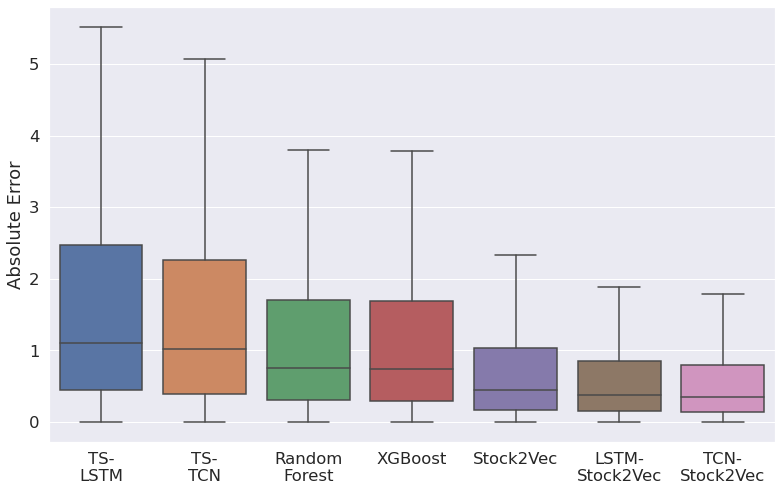

In [612]:
plt.figure(figsize=(13,8))
bp = sns.boxplot(x='Model', y='Absolute Error', data=box_df, showfliers=False)
plt.xlabel('')
# bp.xlabel("")
# bp.set_xticklabels(bp.get_xticklabels(), rotation=45) 
bp.get_figure().savefig('figs/bp.pdf')

## Group by Sector & Ticker

In [519]:
info_df = pd.read_csv('./data/all_stocks_info.csv')
results = results.merge(info_df.loc[:, ['ticker', 'sector']])

In [520]:
results.head()

Date ticker   Adj Close          rf         xgb         tcn  \
0  2020-02-13    ZTS  144.169998  138.683300  139.856296  138.347027   
1  2020-02-12    ZTS  144.940002  139.646006  141.052015  137.288352   
2  2020-02-11    ZTS  142.979996  139.280881  142.594704  137.437688   
3  2020-02-10    ZTS  144.029999  140.789869  142.581690  136.284672   
4  2020-02-07    ZTS  142.550003  138.462844  137.902448  134.330897   

         lstm         s2v        rs2v        cs2v       sector  
0  140.637125  144.854307  145.572001  143.952022  HEALTH CARE  
1  138.972093  146.600037  144.194591  143.637287  HEALTH CARE  
2  139.638145  143.374095  144.356581  143.332578  HEALTH CARE  
3  138.708272  145.020754  143.988057  142.874643  HEALTH CARE  
4  135.559739  146.717214  140.946289  139.927904  HEALTH CARE

In [522]:
mae_bySector = pd.DataFrame()
# pred_cols = ['rf', 'xgb', 's2v', 'lstm', 'tcn', 'rs2v', 'cs2v']
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    mae = results.groupby(['sector']).apply(lambda row: np.abs(row['Adj Close']-row[col])).mean(level=[0])
    mae_bySector[col] = mae
mae_bySector.to_csv('Results/sectorMAE.csv')
mae_bySector

rf       xgb       s2v      rs2v      cs2v
sector                                                                 
BASIC INDUSTRIES       1.064412  1.026823  0.639549  0.517833  0.486067
CAPITAL GOODS          3.126031  3.065329  1.926077  1.565484  1.466866
CONSUMER DURABLES      1.209585  1.179407  0.708848  0.625839  0.568330
CONSUMER NON-DURABLES  0.959788  0.928358  0.566833  0.522808  0.452496
CONSUMER SERVICES      1.829944  1.844451  1.194695  0.981855  0.880997
ENERGY                 0.983126  0.947039  0.497638  0.505467  0.450113
FINANCE                1.193329  1.174581  0.785767  0.550103  0.546231
HEALTH CARE            1.990253  1.958619  1.147295  1.104766  0.921316
MISCELLANEOUS          3.181121  3.175557  2.082531  1.556442  1.438792
PUBLIC UTILITIES       0.627293  0.640952  0.440752  0.339027  0.339460
TECHNOLOGY             1.952038  1.984841  1.258218  0.920602  0.915963
TRANSPORTATION         1.255975  1.233510  0.736576  0.654138  0.559920

In [525]:
mape_bySector = pd.DataFrame()
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    mape = results.groupby(['sector']).apply(lambda row: np.abs(100*(row['Adj Close']-row[col])/row[col])).mean(level=[0])
    mape_bySector[col] = mape
mape_bySector.to_csv('Results/sectorMAPE.csv')
mape_bySector

rf       xgb       s2v      rs2v      cs2v
sector                                                                 
BASIC INDUSTRIES       1.344888  1.314227  0.738675  0.653552  0.613696
CAPITAL GOODS          1.210701  1.238153  0.755634  0.591732  0.560063
CONSUMER DURABLES      1.300510  1.259472  0.727479  0.675149  0.596234
CONSUMER NON-DURABLES  1.479839  1.315224  0.755502  0.845600  0.649314
CONSUMER SERVICES      1.241416  1.233201  0.707895  0.663290  0.592766
ENERGY                 2.031552  1.875053  0.969062  1.078149  0.914126
FINANCE                1.180991  1.158846  0.738774  0.539463  0.524655
HEALTH CARE            1.427053  1.353203  0.787134  0.787941  0.654674
MISCELLANEOUS          1.233309  1.232347  0.808220  0.661293  0.596180
PUBLIC UTILITIES       0.884872  0.903169  0.573977  0.493410  0.465288
TECHNOLOGY             1.439335  1.427574  0.827502  0.684103  0.664261
TRANSPORTATION         1.263190  1.232566  0.714831  0.664061  0.565263

In [524]:
rmse_bySector = pd.DataFrame()
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    rmse = results.groupby(['sector']).apply(lambda row: ((row['Adj Close']-row[col]))**2).mean(level=[0])
    rmse_bySector[col] = np.sqrt(rmse)
rmse_bySector.to_csv('Results/sectorRMSE.csv')
rmse_bySector

rf        xgb       s2v      rs2v      cs2v
sector                                                                   
BASIC INDUSTRIES        1.697212   1.611094  1.062440  0.845893  0.762061
CAPITAL GOODS          11.462278  10.303733  6.254059  6.006880  5.096197
CONSUMER DURABLES       1.782434   1.674159  0.991174  0.930273  0.826122
CONSUMER NON-DURABLES   1.574994   1.547562  0.975397  0.872112  0.752514
CONSUMER SERVICES       4.746921   4.691317  3.339347  2.764398  2.301719
ENERGY                  1.503649   1.443494  0.761030  0.755077  0.668972
FINANCE                 2.078831   2.056964  1.392753  1.050788  0.996541
HEALTH CARE             3.441591   3.371459  1.952152  1.979131  1.603362
MISCELLANEOUS           8.228777   7.960662  5.218867  4.136303  3.734523
PUBLIC UTILITIES        0.937566   0.949873  0.641826  0.521313  0.522197
TECHNOLOGY              4.198387   4.226142  2.914640  1.904673  1.935671
TRANSPORTATION          1.998066   1.904232  1.148588  1.031159  0.878734

In [526]:
rmspe_bySector = pd.DataFrame()
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    rmspe = results.groupby(['sector']).apply(lambda row: ((row['Adj Close']-row[col])/row[col])**2).mean(level=[0])
    rmspe_bySector[col] = np.sqrt(rmspe)*100
rmspe_bySector.round(5).to_csv('Results/sectorRMSPE.csv')
rmspe_bySector

rf       xgb       s2v      rs2v      cs2v
sector                                                                 
BASIC INDUSTRIES       1.856415  1.801376  0.984754  0.907899  0.828490
CAPITAL GOODS          1.629551  1.649058  1.008969  0.832755  0.751411
CONSUMER DURABLES      1.790744  1.684453  0.960041  0.945812  0.814476
CONSUMER NON-DURABLES  2.411877  2.012384  1.133772  1.365461  1.008520
CONSUMER SERVICES      1.880649  1.818193  0.994141  1.067583  0.914568
ENERGY                 2.886697  2.650068  1.284895  1.508676  1.251572
FINANCE                1.601894  1.561965  0.995224  0.777606  0.720061
HEALTH CARE            2.167576  2.001705  1.152127  1.238053  0.990757
MISCELLANEOUS          1.660155  1.633691  1.052060  0.953812  0.813375
PUBLIC UTILITIES       1.246616  1.231665  0.738681  0.712462  0.636439
TECHNOLOGY             2.086923  1.999357  1.132725  1.037794  0.948085
TRANSPORTATION         1.763752  1.681150  0.976538  0.947385  0.797833

## 20 Tickers

In [319]:
symbs20 = ['AAPL', 'AFL', 'AMZN', 'BA', 'CVX', 'DAL', 'DIS', 'FB', 'GE', 'GM',
         'GS', 'JNJ', 'JPM', 'MAR', 'KO', 'MCD', 'NKE', 'PG', 'VZ', 'WMT']

In [391]:
results.head()

Date ticker  Adj Close        rf       xgb       tcn      lstm  \
0  2020-02-13    ZTS   4.906980  4.720235  4.760159  4.708789  4.852196   
1  2020-02-12    ZTS   4.933188  4.753001  4.800856  4.672756  4.798975   
2  2020-02-11    ZTS   4.866477  4.740574  4.853364  4.677839  4.825471   
3  2020-02-10    ZTS   4.902215  4.791934  4.852921  4.638595  4.779641   
4  2020-02-07    ZTS   4.851842  4.712731  4.693658  4.572096  4.669027   

        s2v      rs2v      cs2v       sector  
0  4.930272  4.954699  4.899561  HEALTH CARE  
1  4.989689  4.907817  4.888849  HEALTH CARE  
2  4.879891  4.913331  4.878478  HEALTH CARE  
3  4.935937  4.900788  4.862892  HEALTH CARE  
4  4.993678  4.797258  4.762596  HEALTH CARE

In [528]:
mae20 = pd.DataFrame()
# pred_cols = ['rf', 'xgb', 's2v', 'lstm', 'tcn', 'rs2v', 'cs2v']
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    mae = results.groupby(['ticker']).apply(lambda row: np.abs(row['Adj Close']-row[col])).mean(level=[0])
    mae = mae[symbs20]
    mae20[col] = mae
mae20.to_csv('Results/Symbs20MAE.csv')
mae20

rf        xgb        s2v       rs2v       cs2v
ticker                                                       
AAPL     3.628103   3.560479   2.152533   1.721598   1.416627
AFL      0.452222   0.442183   0.347300   0.201609   0.203281
AMZN    22.192038  21.361793  17.872715  11.534734  10.293130
BA       4.591589   5.103634   2.871236   2.872644   2.743785
CVX      1.068076   1.216296   0.753860   0.572294   0.496605
DAL      0.587903   0.578662   0.363393   0.292799   0.243748
DIS      1.368688   1.397856   0.872640   0.768158   0.670448
FB       2.538575   3.797808   1.649716   1.162993   1.063915
GE       0.301118   0.216845   0.112539   0.252681   0.149373
GM       0.437546   0.439838   0.226845   0.227925   0.218854
GS       2.475643   2.368770   1.309449   1.013358   1.051279
JNJ      1.212572   1.037164   0.715377   0.640834   0.587876
JPM      1.336681   1.234030   1.167348   0.505471   0.522806
MAR      1.633470   1.659733   1.134386   0.651823   0.866983
KO       0.392418   0.369706   0.248158   0.191029   0.188440
MCD      1.993973   1.956128   1.257465   0.893525   0.890448
NKE      0.970374   0.977009   0.772171   0.460478   0.494323
PG       1.141677   1.034129   0.699289   0.522251   0.482922
VZ       0.430747   0.418014   0.359565   0.219293   0.203548
WMT      1.015947   1.096858   0.869869   0.410722   0.410730

In [529]:
mape20 = pd.DataFrame()
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    mape = results.groupby(['ticker']).apply(lambda row: np.abs(100*(row['Adj Close']-row[col])/row[col])).mean(level=[0])
    mape = mape[symbs20]
    mape20[col] = mape
mape20.to_csv('Results/symbs20MAPE.csv')
mape20

rf       xgb       s2v      rs2v      cs2v
ticker                                                  
AAPL    1.432325  1.388640  0.796671  0.676398  0.542148
AFL     0.877111  0.856377  0.660483  0.388871  0.391668
AMZN    1.209835  1.172740  0.965282  0.627490  0.560136
BA      1.330720  1.471353  0.817946  0.833487  0.795268
CVX     0.937374  1.061619  0.646851  0.495729  0.433485
DAL     1.034821  1.016125  0.632912  0.513531  0.428037
DIS     0.991370  1.011920  0.613460  0.553697  0.484047
FB      1.294304  1.920848  0.820813  0.587222  0.541766
GE      2.987447  2.130138  1.104575  2.527441  1.436184
GM      1.222003  1.226890  0.626892  0.632715  0.606206
GS      1.139224  1.091213  0.592209  0.461173  0.482587
JNJ     0.895186  0.767790  0.513760  0.474591  0.434769
JPM     1.080928  1.001985  0.898890  0.402861  0.418185
MAR     1.212933  1.231346  0.812673  0.484703  0.634436
KO      0.719278  0.680706  0.447554  0.350236  0.345118
MCD     0.975014  0.957146  0.608029  0.437289  0.436352
NKE     1.049719  1.056272  0.802063  0.492493  0.531493
PG      0.942835  0.854065  0.568743  0.428880  0.397883
VZ      0.734717  0.711068  0.599721  0.370557  0.344996
WMT     0.875497  0.941528  0.732647  0.351073  0.351982

In [531]:
rmse20 = pd.DataFrame()
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    rmse = results.groupby(['ticker']).apply(lambda row: ((row['Adj Close']-row[col]))**2).mean(level=[0])
    rmse = np.sqrt(rmse[symbs20])
    rmse20[col] = rmse
    
rmse20.to_csv('Results/symbs20RMSE.csv')
rmse20

rf        xgb        s2v       rs2v       cs2v
ticker                                                       
AAPL     4.710724   4.523441   2.861870   2.160465   1.813353
AFL      0.592833   0.616205   0.459526   0.307780   0.271817
AMZN    29.905578  28.465410  23.802398  17.734765  14.446992
BA       5.997194   6.435638   3.982966   3.827106   3.493076
CVX      1.422423   1.617330   1.027858   0.751820   0.652762
DAL      0.787428   0.773552   0.475430   0.403305   0.323283
DIS      1.949884   1.911381   1.171509   1.096479   0.918963
FB       3.507384   5.543760   2.150148   1.721374   1.443512
GE       0.393314   0.295966   0.137844   0.288781   0.179567
GM       0.582175   0.574415   0.298849   0.303233   0.277179
GS       3.109777   3.002807   1.862625   1.266739   1.311563
JNJ      1.801741   1.490403   0.999108   0.927667   0.803934
JPM      1.720390   1.627813   1.586731   0.664796   0.676960
MAR      2.017640   2.019808   1.524704   0.885001   1.070399
KO       0.494143   0.500619   0.318504   0.255405   0.247314
MCD      2.670802   2.498678   1.509921   1.256432   1.158587
NKE      1.268993   1.230730   1.007027   0.609078   0.620121
PG       1.432837   1.347553   0.905416   0.699302   0.606328
VZ       0.543389   0.548600   0.458053   0.291333   0.264536
WMT      1.335985   1.426359   1.063776   0.552603   0.500697

In [532]:
rmspe20 = pd.DataFrame()
for col in ['rf', 'xgb', 's2v', 'rs2v', 'cs2v']:
    rmspe = results.groupby(['ticker']).apply(lambda row: ((row['Adj Close']-row[col])/row[col])**2).mean(level=[0])
    rmspe = np.sqrt(rmspe[symbs20])*100
    rmspe20[col] = rmspe
rmspe20.to_csv('Results/symbs20RMSPE.csv')
rmspe20

rf       xgb       s2v      rs2v      cs2v
ticker                                                  
AAPL    1.891386  1.755195  1.042116  0.854858  0.681338
AFL     1.153395  1.193134  0.869523  0.597192  0.527601
AMZN    1.603355  1.554248  1.281648  0.954376  0.776363
BA      1.743886  1.854217  1.127611  1.112805  1.016002
CVX     1.253875  1.415502  0.876434  0.649522  0.570852
DAL     1.387870  1.358859  0.825592  0.707205  0.568700
DIS     1.414952  1.383501  0.809188  0.787747  0.661251
FB      1.773026  2.750520  1.061441  0.852112  0.730318
GE      3.964878  2.890564  1.350681  2.905699  1.716848
GM      1.622447  1.597732  0.823596  0.837671  0.765435
GS      1.437678  1.394779  0.838600  0.577588  0.606069
JNJ     1.330505  1.110050  0.715060  0.696781  0.601338
JPM     1.397428  1.330405  1.198494  0.528395  0.542722
MAR     1.493793  1.495645  1.071058  0.655268  0.775687
KO      0.900648  0.919332  0.568959  0.467606  0.451292
MCD     1.303489  1.220284  0.729483  0.616024  0.568357
NKE     1.380374  1.340460  1.034076  0.649631  0.672769
PG      1.185006  1.114791  0.731490  0.575489  0.500915
VZ      0.927955  0.933073  0.757190  0.492021  0.449026
WMT     1.154828  1.225083  0.890066  0.473593  0.430028

# Plotting

In [336]:
results.head()

Date ticker  Adj Close        rf       xgb       tcn      lstm  \
0  2020-02-13    ZTS   4.906980  4.720235  4.760159  4.708789  4.852196   
1  2020-02-12    ZTS   4.933188  4.753001  4.800856  4.672756  4.798975   
2  2020-02-11    ZTS   4.866477  4.740574  4.853364  4.677839  4.825471   
3  2020-02-10    ZTS   4.902215  4.791934  4.852921  4.638595  4.779641   
4  2020-02-07    ZTS   4.851842  4.712731  4.693658  4.572096  4.669027   

        s2v      rs2v      cs2v       sector  
0  4.930272  4.954699  4.899561  HEALTH CARE  
1  4.989689  4.907817  4.888849  HEALTH CARE  
2  4.879891  4.913331  4.878478  HEALTH CARE  
3  4.935937  4.900788  4.862892  HEALTH CARE  
4  4.993678  4.797258  4.762596  HEALTH CARE

In [635]:
symbs20

['AAPL',
 'AFL',
 'AMZN',
 'BA',
 'CVX',
 'DAL',
 'DIS',
 'FB',
 'GE',
 'GM',
 'GS',
 'JNJ',
 'JPM',
 'MAR',
 'KO',
 'MCD',
 'NKE',
 'PG',
 'VZ',
 'WMT']

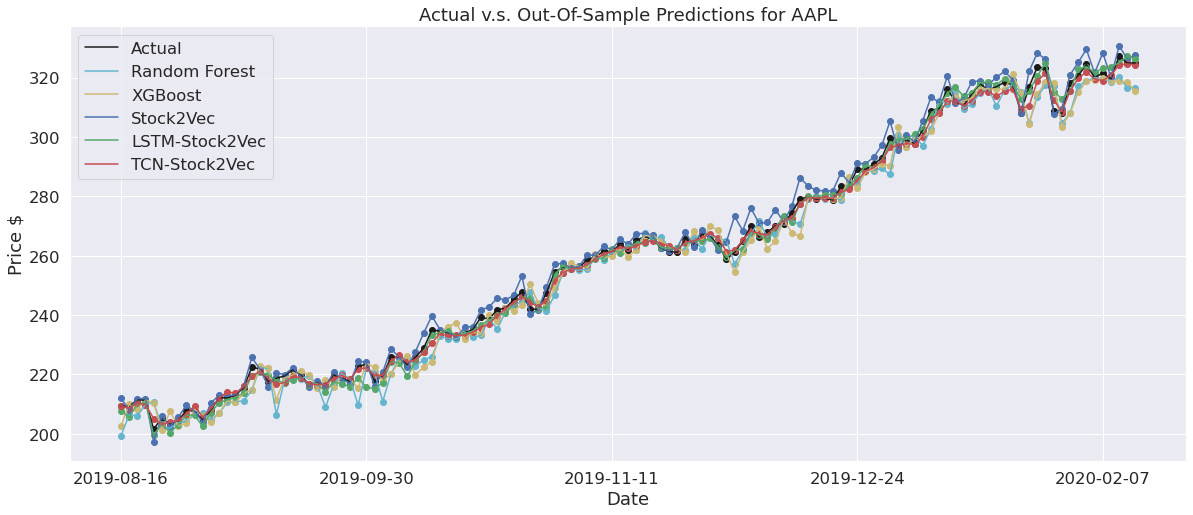

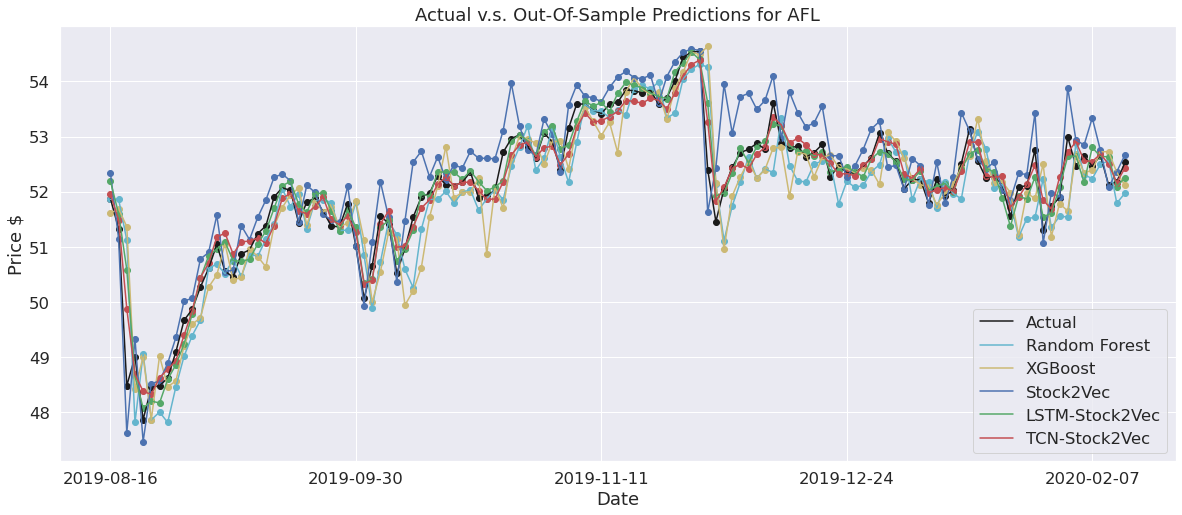

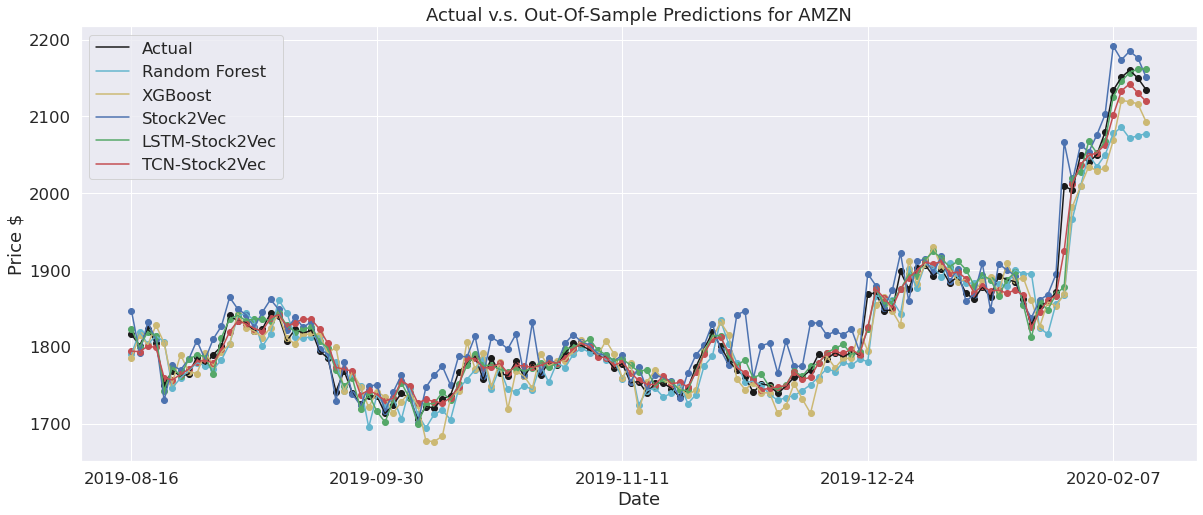

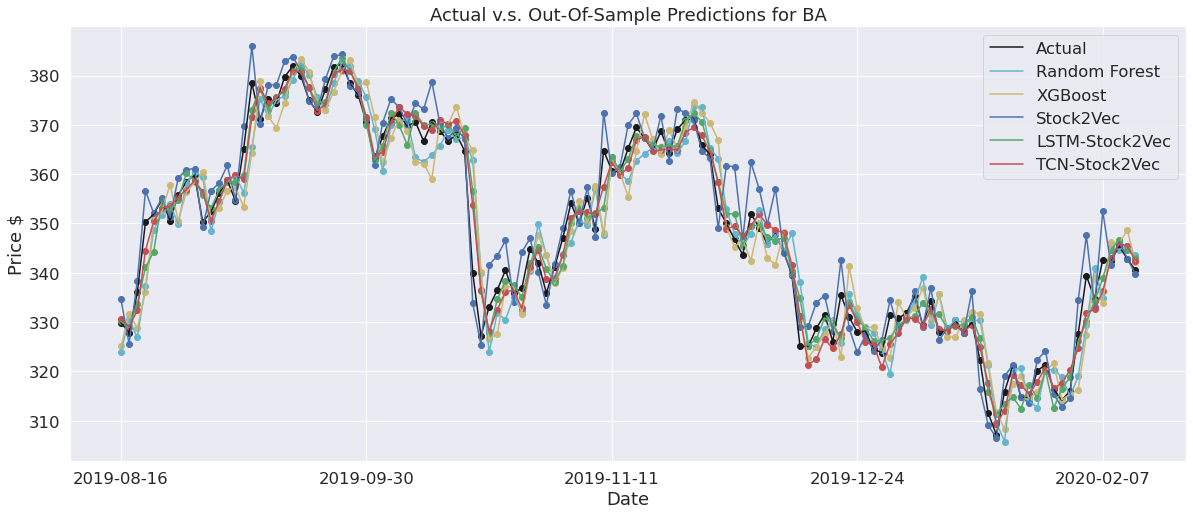

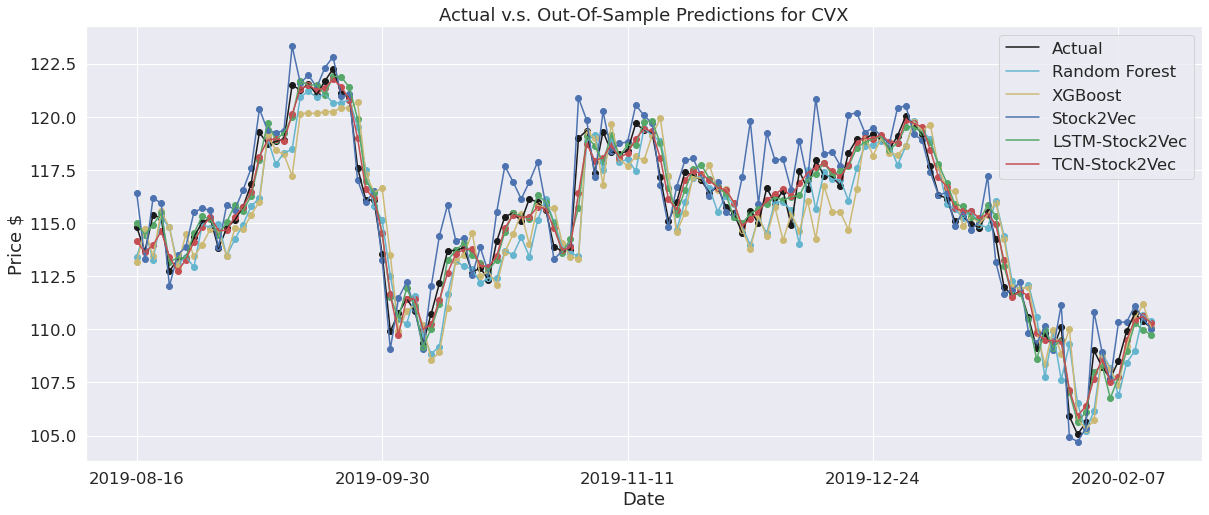

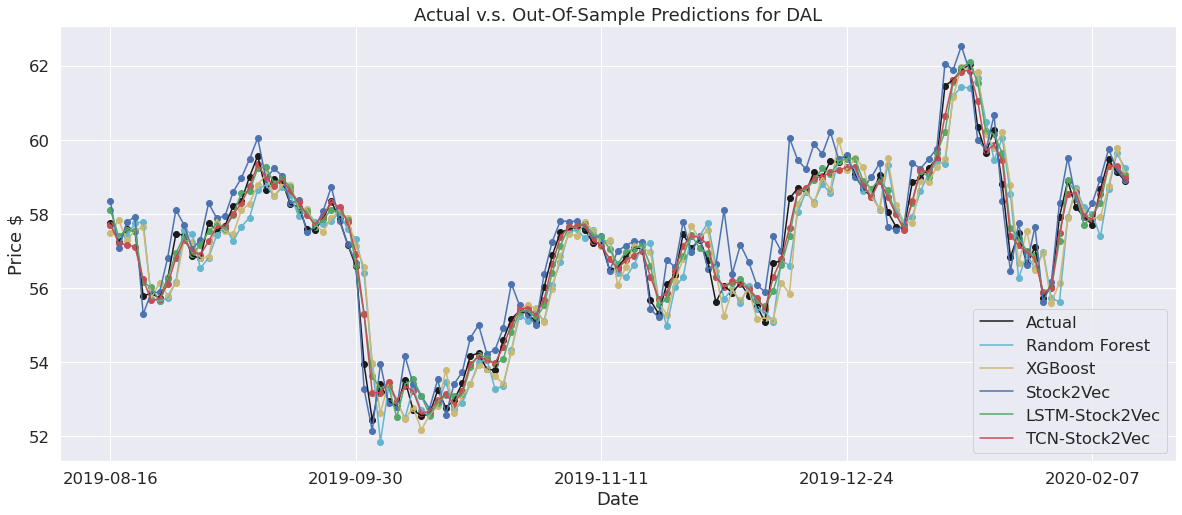

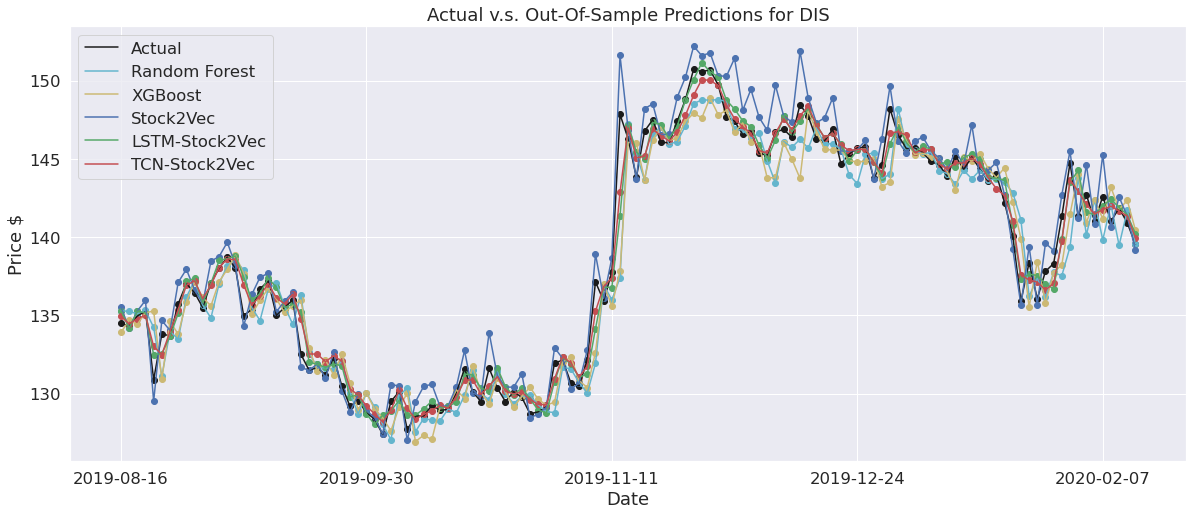

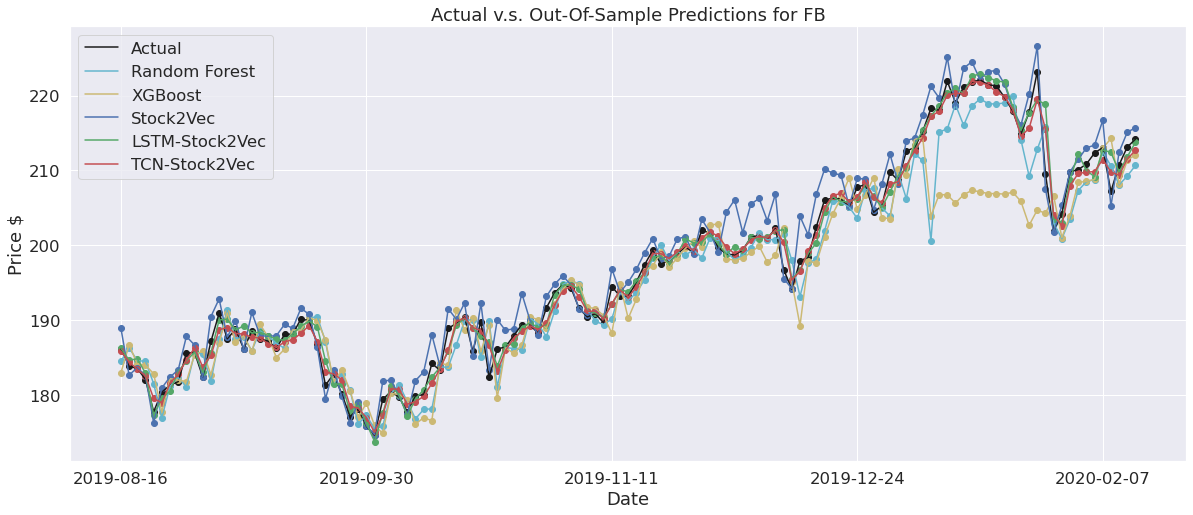

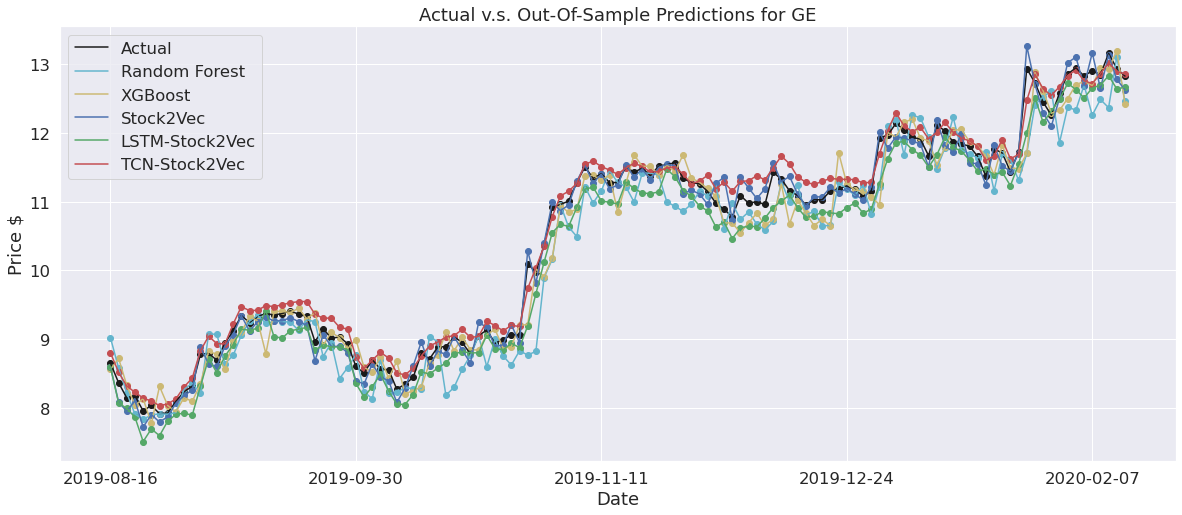

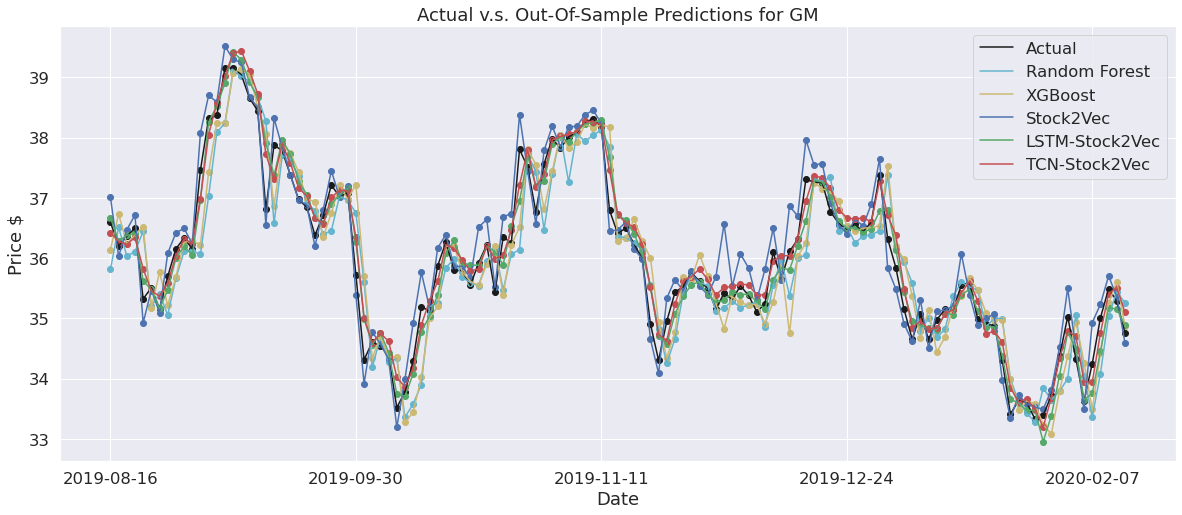

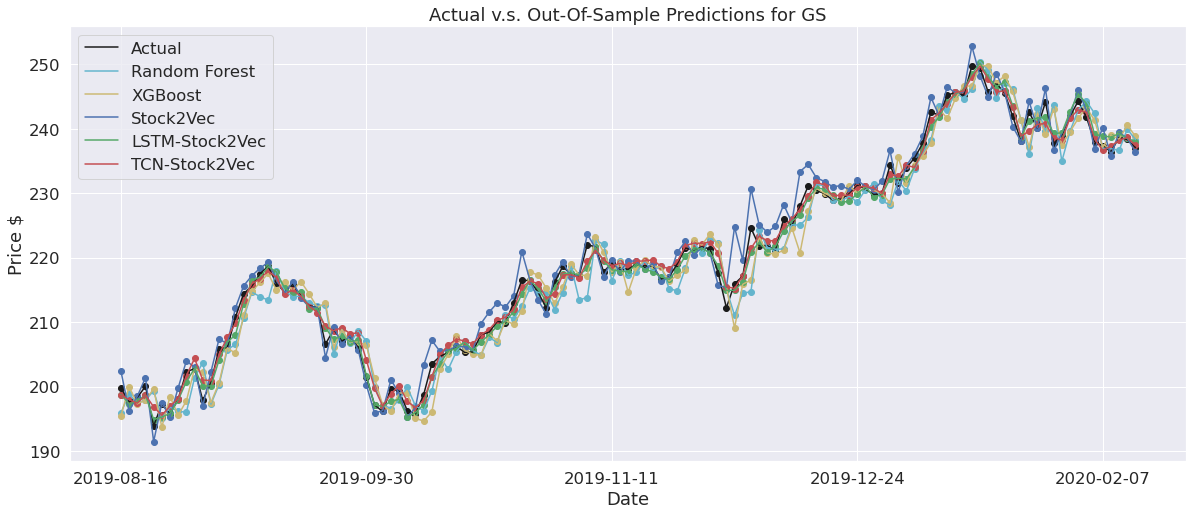

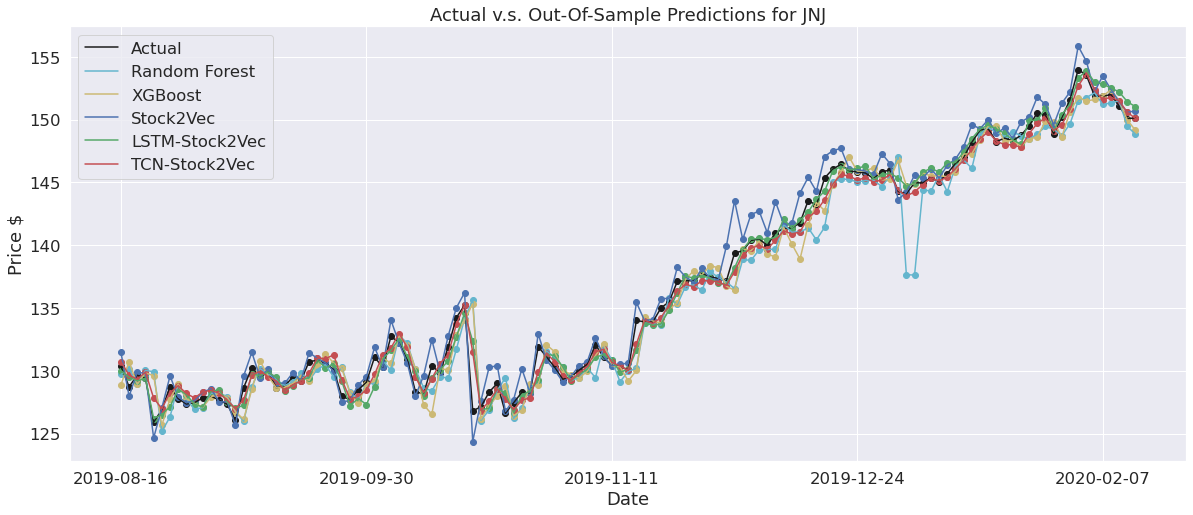

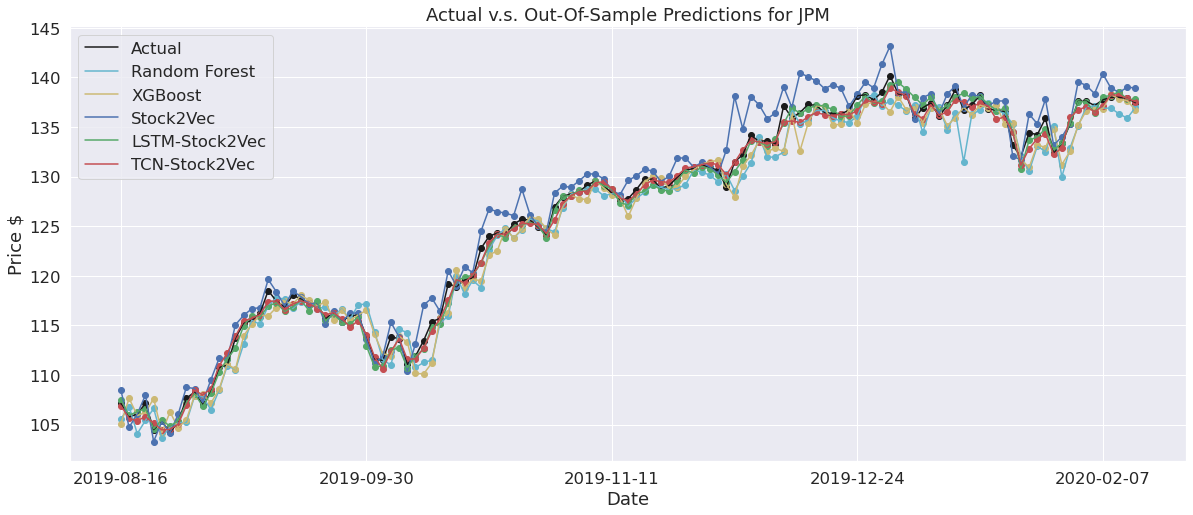

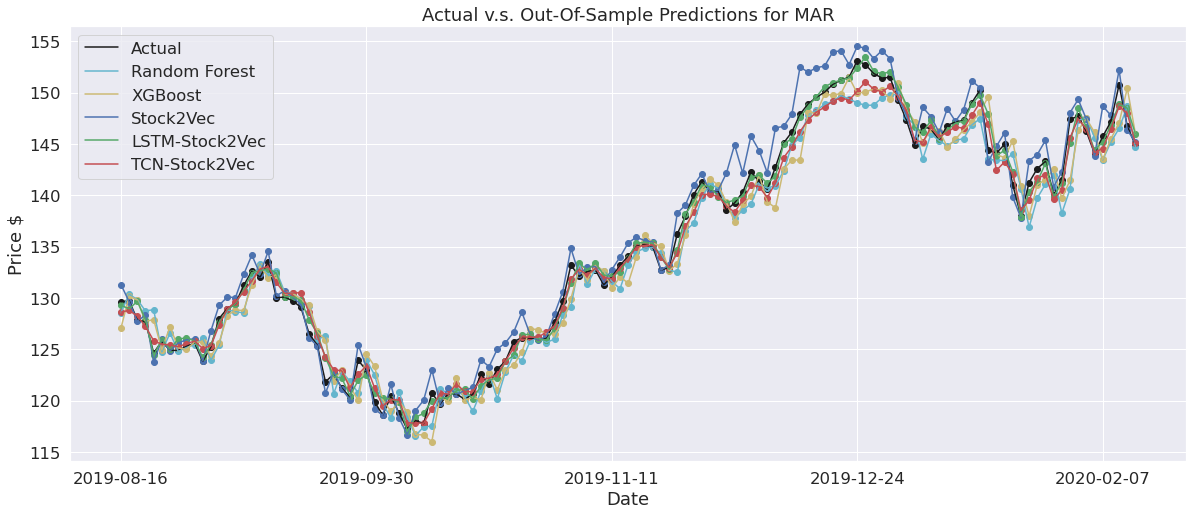

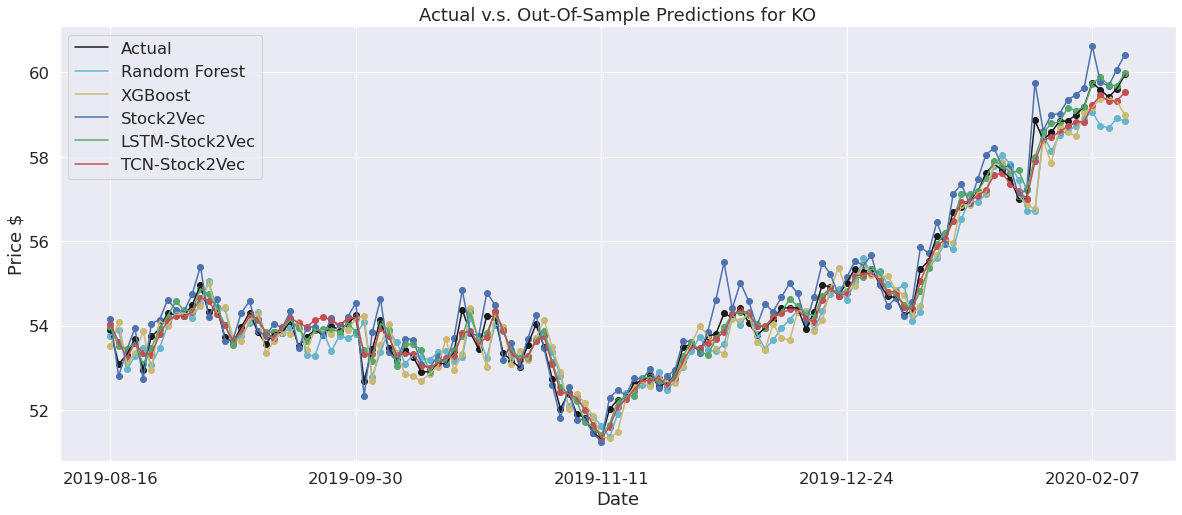

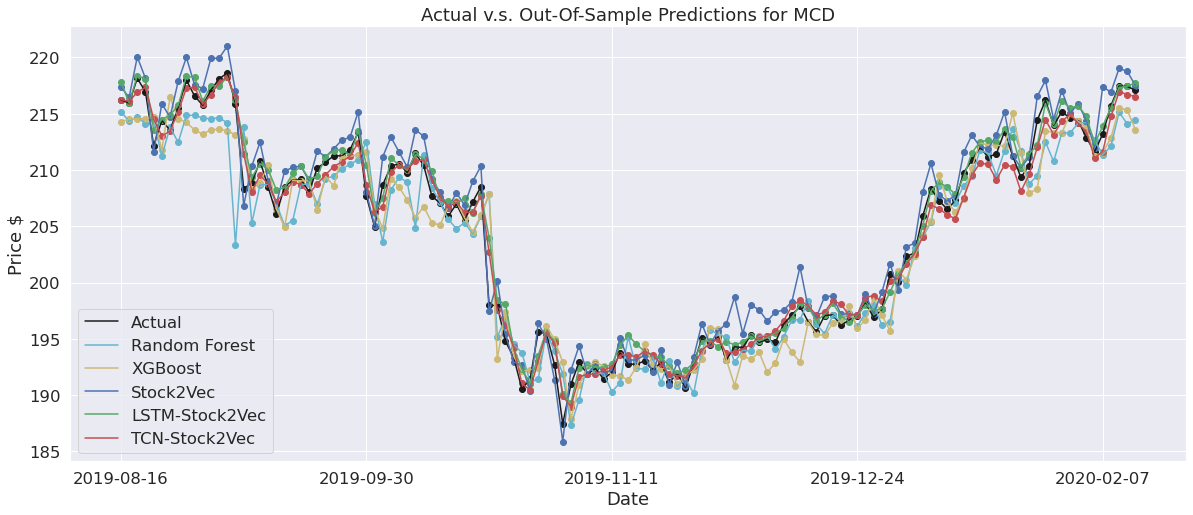

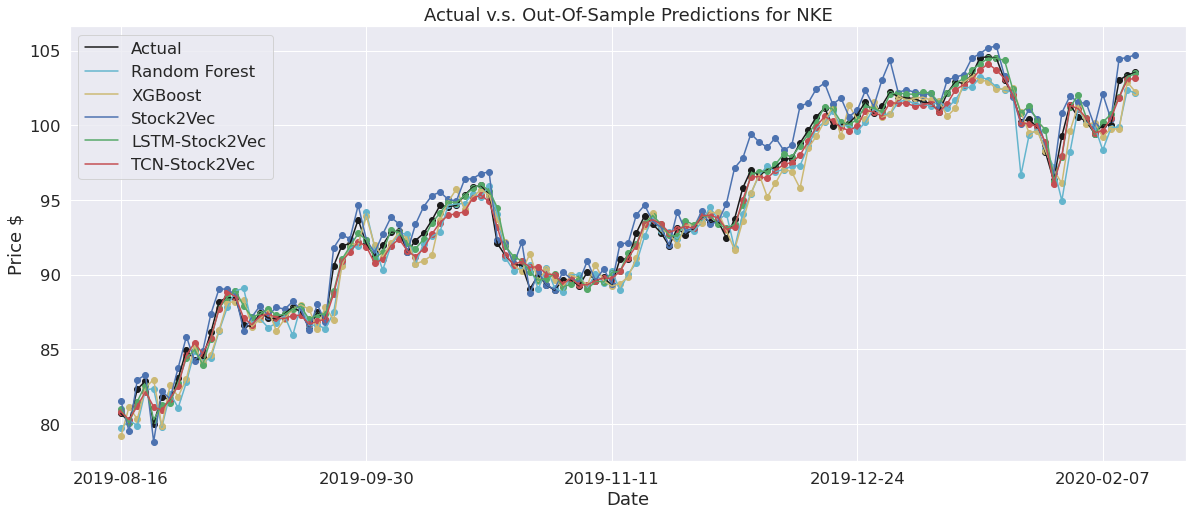

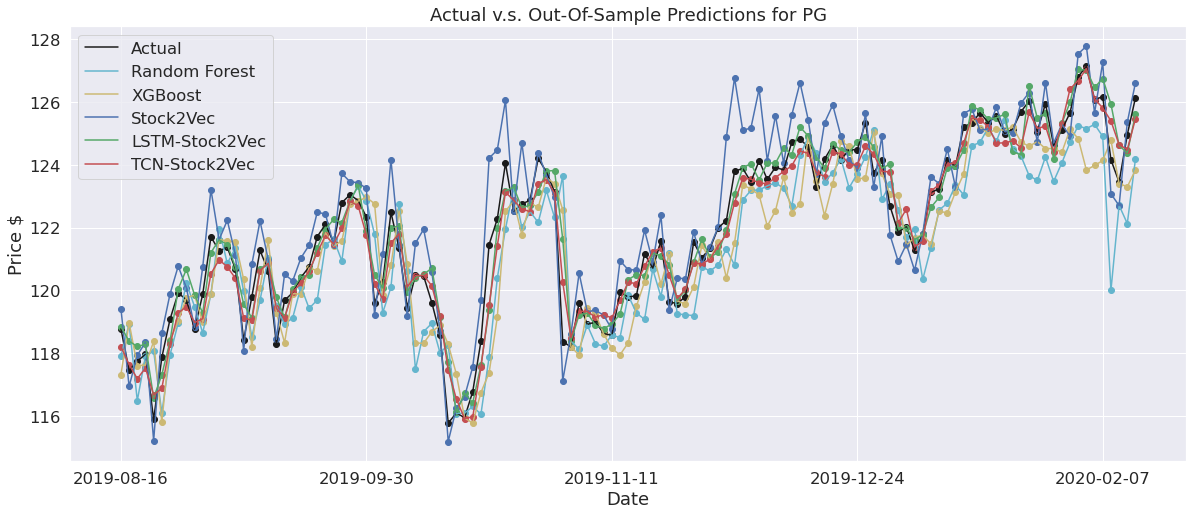

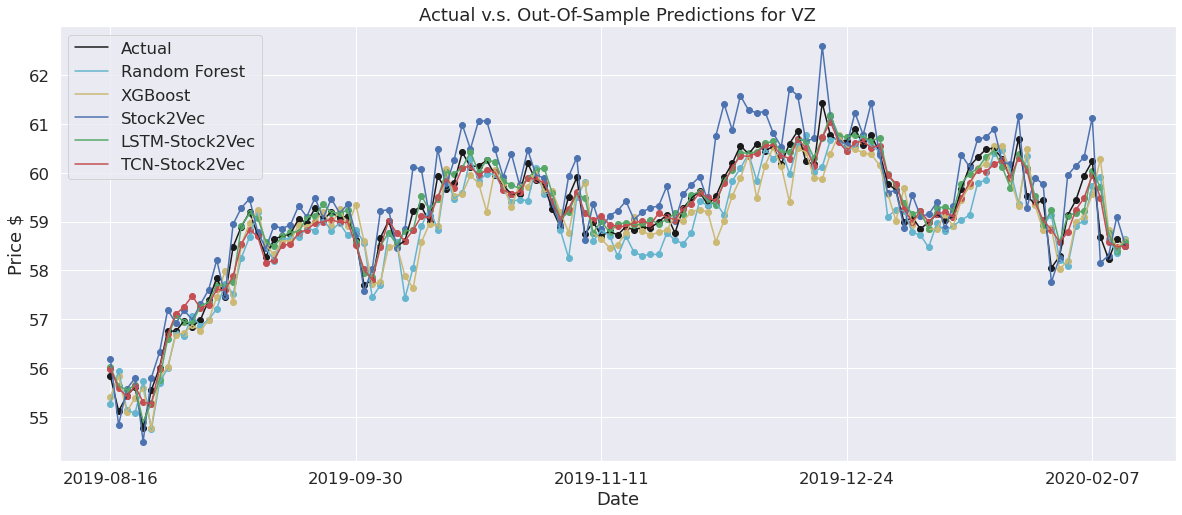

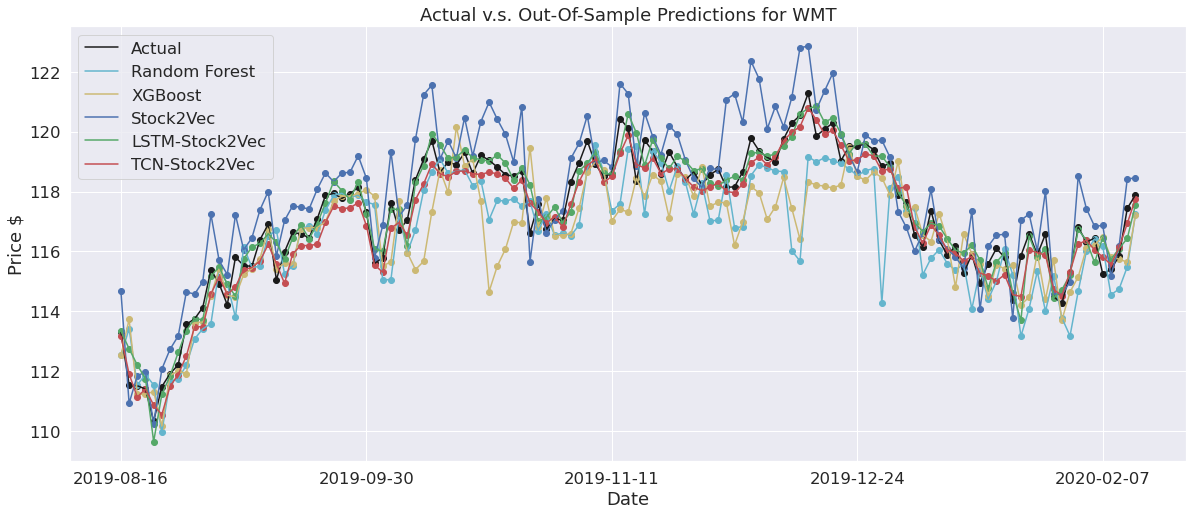

In [641]:
def plot_allpreds(df, ticker):
    idx = df[df.ticker==ticker].index
#     xplot = np.arange(len(idx))
#     xplot = list(range(len(idx)))
    xplot = df.loc[idx, 'Date'].values[::-1]
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    labels = ['Actual', 'Random Forest', 'XGBoost', 'Stock2Vec', 'LSTM-Stock2Vec', 'TCN-Stock2Vec']
    columns = ['Adj Close','rf', 'xgb', 's2v',  'rs2v', 'cs2v']
        
    colors = ['k', 'c', 'y', 'b', 'g', 'r']
    for col, lab, c in zip(columns, labels, colors):
        yplot = df.loc[idx, col].values[::-1]
        plt.plot(xplot, yplot, label=lab, color=c)
        plt.scatter(xplot,yplot, color=c)
        
    plt.legend()
    plt.title("Actual v.s. Out-Of-Sample Predictions for %s"%ticker)
    plt.xlabel("Date")
    plt.ylabel("Price $") 
    plt.xticks(xplot[::30])#, rotation=30)
    plt.savefig("figs/plot_%s.pdf"%ticker)
  
# plot_allpreds(results, 'GOOG')
for ticker in symbs20:
    plot_allpreds(results, ticker)

In [618]:
df1 = results.copy()
ticker = 'GOOG'
idx = df1[df1.ticker==ticker].index
temp = df1.loc[idx, 'Date'].values[::-1]
temp
# col = 'Adj Close'

# df2 = df1.loc[idx, ['Date', col]]
# df2.head()

# xplot = np.arange(len(idx))
# yplot = df1.loc[idx, col].values[::-1]
# plt.plot(xplot, yplot)
# yplot = df1.loc[idx, 'rf'].values[::-1]

# plt.xticks(temp[::-12])


# yplot
# # plt.plot(xplot, yplot)

array(['2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
       '2019-08-22', '2019-08-23', '2019-08-26', '2019-08-27',
       '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03',
       '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-09',
       '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13',
       '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
       '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25',
       '2019-09-26', '2019-09-27', '2019-09-30', '2019-10-01',
       '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07',
       '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11',
       '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
       '2019-10-18', '2019-10-21', '2019-10-22', '2019-10-23',
       '2019-10-24', '2019-10-25', '2019-10-28', '2019-10-29',
       '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-04',
       '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
       '2019-11-11', '2019-11-12', '2019-11-13', '2019-

In [ ]:
sns.set(style="darkgrid", font_scale=1.5)
# new_labels = ['Random Forest', 'XGBoost', 'Stock2Vec', 'LSTM-Stock2Vec', 'TCN-Stock2Vec']

cols = ['Adj Close', 'rf', 'xgb', 's2v', 'rs2v', 'cs2v']
temp = results.loc[results.ticker=='AMZN', cols]
g = sns.lineplot(data=temp, x='Date', y=key, hue='Condition')
plt.legend(new_labels, loc='lower right')
# plt.xlabel('Episode')
# plt.ylabel('Average Q Values')
# plt.xlim(0, 10000)
# plt.ylim(-10, 120)
plt.show()

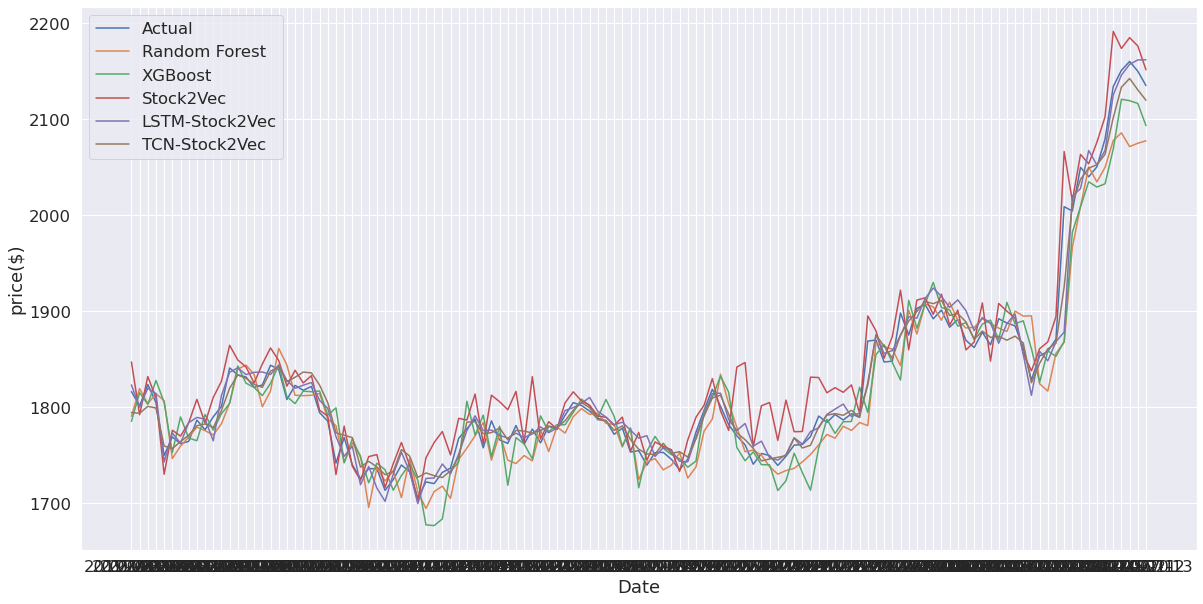

In [537]:
sns.set(style="darkgrid", font_scale=1.5)
new_labels = ['Actual', 'Random Forest', 'XGBoost', 'Stock2Vec', 'LSTM-Stock2Vec', 'TCN-Stock2Vec']
cols = ['Date', 'Adj Close', 'rf', 'xgb', 's2v', 'rs2v', 'cs2v']
temp = results.loc[results.ticker=='AMZN', cols]
# temp.head()
plt.figure(figsize=(20, 10))
temp = temp.melt('Date', var_name='cols',  value_name='price($)')
# g = sns.factorplot(x="Date", y="vals", hue='cols', data=temp)
sns.lineplot(data=temp, x='Date', y='price($)', hue='cols')
plt.legend(new_labels, loc='best')
plt.savefig('plot_goog.pdf')

In [ ]:
# models = ['Random Forest', 'XGBoost', 'Stock2Vec', 'TCN', 'LSTM', 'LSTM-Stock2Vec', 'TCN-Stock2Vec']
# pred_cols = ['rf', 'xgb', 's2v', 'lstm', 'tcn', 'rs2v', 'cs2v']
# dfs =       [rf,    xgb,   s2v,   lstm,   tcn,   rs2v,   cs2v]
# box_df = pd.DataFrame(columns=['Absolute Error', 'Model'])
# for model, pred_col, df in zip(models, pred_cols, dfs):
#     if model in ['LSTM', 'TCN']:
#         continue
#     temp = pd.DataFrame(np.abs((df['Adj Close'] - df[pred_col]).values.flatten()), columns=['Absolute Error'])
#     temp['Model'] = model
# #     print(temp.head())
#     box_df = box_df.append(temp)
# box_df.head()